## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape #This function returns the number of rows and columns.

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique() #This function returns the number of unique rows

290584

d. The proportion of users converted.

In [5]:
len(df.index)

294478

In [6]:
len(df.query('converted==1'))/len(df.index) #This function returns the value's average

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#This function counts rows where treatment and new page don't match 
group1 = len(df.query('group!="treatment" and landing_page=="new_page"'))# number of times when group is not treatment but langing page is new page
group2 = len(df.query('group!="control" and landing_page=="old_page"'))# number of times when group is not control but langing page is old page

In [8]:
group=group1+group2
group

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
df.isnull().sum() #This function Counts all null value

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
#This function copies the dataframe
df2 = df
df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) != False]

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# This function finds the unique user_ids
df2.user_id.nunique()

290584

In [14]:
# Alternative method
print(f'Number of unique users in the dataset [df2] is {df2.user_id.nunique()}.')

Number of unique users in the dataset [df2] is 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat **user_id**? 

In [15]:
# This function finds for the repeat user_id in a column 
df2[df2.duplicated(subset="user_id", keep=False)] #duplicated() returns the index of of the cuplicate columns

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# This function removes duplicate rows
df2 = df2.drop_duplicates()

In [17]:
sum(df2.duplicated()) # This function Checks again to see whether duplicated values have been removed.

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# This function issues the probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959667567149027

In [19]:
# Alternative method
conv_probability = df2.converted.mean()
print('The probability of an individual converting regardless of the page they receive is {:.5f}'.format(conv_probability))

The probability of an individual converting regardless of the page they receive is 0.11960


b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# This function issues, given that a person was in the control group, what is the likelihood of that individual converting?
conv_prob_probability = df2[df2.group == 'control'].converted.mean()
print('Given that an individual was in the control group, the probability they converted is {:.5f}'.format(conv_prob_probability ))

Given that an individual was in the control group, the probability they converted is 0.12039


In [21]:
# Alternative method
control_group = len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
control_group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# This function issues, given that a person was in the therapy group, the likelihood of that individual converting increased.
conv_probability_treatment = df2[df2.group == 'treatment'].converted.mean()
print('Given that an individual was in the treatment group, the probability they converted is {:.5f}'.format(conv_probability_treatment))

Given that an individual was in the treatment group, the probability they converted is 0.11881


In [23]:
# Alternative method
treatment_group = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
treatment_group

0.11880724790277405

d. What is the probability that an individual received the new page?

In [24]:
# This function issues likelihood/probability  of an individual receiving a new page
new_page_probability = (df2['landing_page'] == "new_page").mean()
print('The probability that an individual received the new page is {:.5f}'.format(new_page_probability))

The probability that an individual received the new page is 0.50006


In [25]:
# Alternative method
len(df2.query('landing_page=="new_page"'))/len(df2.index)

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**In Short:**

No, there isn't enough proof that the treatment page increases conversions. According to the data shown above, control pages suggest a higher conversion rate.

**In Detail:**

The probability of an individual converting if he or she is in the control group is 0.12039. The probability of an individual converting given that the individual is in the treatment group is 0.11881. The probability that the 'control' group converted is greater than the probability that the 'treatment' group converted. The probability that an individual received the new page is equal to 0.50006.

According to the analysis this is clear that there is no more conversion between new page and old page. As the converting rate is similar in both cases so it is important to consider other factors. 

Furthermore, the likelihood of conversion in the control group is somewhat greater than in the treatment group (conv prob control > conv prob treatment). For each page type, the number of events leading to old and new pages is well balanced (new page prob) (there is no bias existing potentially disturbing existence of the evidence).

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H{_0}$ : $p_{new}$ <= $p_{old}$

$H{_1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
p_new=df2.converted.mean()
p_new
print('The P_new is {:.5f}'.format(p_new))

The P_new is 0.11960


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old=df2.converted.mean()
p_old
print('The P_old is {:.5f}'.format(p_old))

The P_old is 0.11960


c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
n_new=df2.query('landing_page=="new_page"').count()[0]
n_new
print('The N_new is {}'.format(n_new))

The N_new is 145311


d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old=df2.query('landing_page=="old_page"').count()[0]
n_old
print('The N_old is {}'.format(n_old))

The N_old is 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# Under the null condition, simulate n old transactions with a conversion rate of p new.
new_page_converted  = np.random.choice([1,0],size =n_new ,p=[p_new,(1-p_new)]).mean()
print('The new_page_converted is {:.5f}'.format(new_page_converted))

The new_page_converted is 0.12062


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
# Under the null condition, simulate n old transactions with a conversion rate of p old.
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old]).mean()
print('The old_page_converted is {:.5f}'.format(new_page_converted))

The old_page_converted is 0.12062


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
# calculated differences between p new and p old
diff=new_page_converted.mean()-old_page_converted.mean()
diff

0.00029968824764609048

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
# Create sampling distribution for difference in p_new-p_old simulated values
# with boostrapping
p_diffs=[]
new_convert=np.random.binomial(n_new, p_new, 10000)/n_new
old_convert=np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs=new_convert-old_convert

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [34]:
exp_convert=df2.query('group=="treatment"').converted.mean() #Proportion of treatment group converted

In [35]:
ctr_convert=df2.query('group=="control"').converted.mean() #Proportion of control group converted

In [36]:
d=exp_convert - ctr_convert
d

-0.0015790565976871451

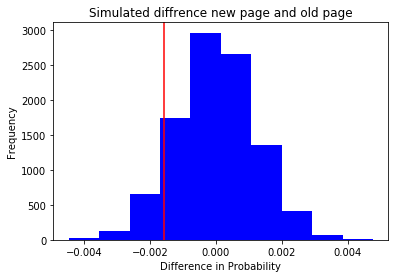

In [37]:
#histogram of p_diff
p_diffs = np.array(p_diffs)
plt.hist(p_diffs, color = "Blue")
plt.title("Simulated diffrence new page and old page")
plt.xlabel('Difference in Probability')
plt.ylabel('Frequency');
plt.axvline(d, color='red') #draw a line on x-axis of value @d

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
(d < p_diffs).mean()

0.90549999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In Short**

The computed number is known as the p-value. which indicates whether or not there is a statistically significant difference between two groups given a hypothesis. In this situation, the new page does not outperform the old page since the value 0.9 is significantly more than the alpha, 0.05.


**In Detail**

The p-value for adopting the null hypothesis should be larger than the proposed p-value. We calculate that over 90% of the population is above the true difference, implying that the new page is not performing much better than the previous page. Because the new page is worse than the previous page, we should remain with the null hypothesis because the p-value is high.

#### Based on 10,000 simulated samples where:

- d reflects the difference in conversion rates between new and old pages.  

- p diffs indicates the simulated difference between conversion rates of new and old pages.

> The old pages are stronger than the new pages. The proportion of p diffs that are larger than the actual difference recorded in ab data.csv is 4-89.7 percent known as the p-value in scientific investigations. This number indicates that the null hypothesis cannot be rejected.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page=="new_page"').count()[0]

print(convert_old)
print(n_old)
print(convert_new)
print(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
145274
17264
145311


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')

#display z_score and p_value
print(p_value)
print(z_score)

0.905173705141
-1.31160753391


In [41]:
from scipy.stats import norm
norm.cdf(z_score) #how significant our z_score is

0.094826294859409022

In [42]:
norm.ppf(1-(0.05)) #critical value of 95% confidence

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

- The z-score indicates how far a data point deviates from the population mean. It is larger than the value of -0.1645 (one-tail test), implying that we cannot reject the null hypothesis. 

- The p-value, on the other hand, establishes the importance of our findings. Although the numbers change from sections j and k, they still indicate that there is no statistically significant difference between the new and old pages.


> More Reason: The z score is less than the crucial value of 95% confidence. As a result, we are unable to reject the null hypothesis. As a result, the conclusion is the same as in section j: we accept the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression should be utilized because we are dealing with binary output.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
# Adding a column for intercepts
df2['intercept'] = 1

# Make a dummy variable column.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary2() # The following is a summary of our test results.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-23 06:14 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

As 0.19 > 0.05, the p-value indicates that the new page is not statistically significant. The numbers differ because, in part 2, we randomly selected the data 10000 times, and the sample might have overlapped or been mutually exclusive to such an extent that different values were obtained, resulting in different p-values than what we obtained in logistic regression.

Moreover, The estimated p-value is 0.190. Because the Logistic Regression is based on a two-tailed test, this is the case. Because 0.190 is larger than 0.05 (our $alpha$), we cannot reject our null hypothesis.

In Logistic regression

$H_1$ : $p_{new}$ - $p_{old}$ != $0$

Part 2

$H_0$ : $p_{new}$ - $p_{old}$ <= $0$

$H_1$ : $p_{new}$ - $p_{old}$ > $0$



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

1. Taking additional factors/explanatory variables into account makes our hypothesis results more trustworthy since it improves the r-squared values and we may miss other influencing aspects of our response variables. 

However, if there is multicolinearity, or connection between explanatory factors, our results will be incorrect. As a result, we must ensure that there is no multicolinearity.

2. If these extra characteristics are included in the regression models, they may impact conversions as well. The drawback is that we don't know inwhich direction our extra element will affect the outcome. Because our additional factor varies based on an additional element.

last note:

3. Conversion rate may be also connected to user characteristics such as nationality, age, gender, or unique cultural habit. Including more information about users may reveal a hidden value of the updated version of the page for a certain set of people.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
# Store Countries.csv data in dataframe
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
#Inner join two datas
df2 = df2.join(country_df.set_index('user_id'), on='user_id', how='inner')

In [48]:
df2[['CA','UK', 'US']] = pd.get_dummies(df2['country'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [49]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA','UK']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-23 06:14 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
==================================================================

"""

Although I don't know what Pseudo means, a quick search reveals that it is a similar measure to R-squared, and there are no huge differences in the coefficient, as Canada students are 0.96 times less to convert than United States holding page constant, and United Kingdom students are identical to United States holding page constant. Finally, the p-value also dose not appear to be statically significant in all variables.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
df2['CA_page'] = df2['ab_page'] * df2['CA']
df2['UK_page'] = df2['ab_page'] * df2['UK']
df2['US_page'] = df2['ab_page'] * df2['US']

logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page', 'CA','UK', 'CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-23 06:14 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5060  0.1321  -0.0474   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_page      -0.0469    0.0538    -0.8716  0.3834  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1811  0.2375  -0.0207   0.0835
==================================================================

"""

## conclusions

> **In Short:**
According to the aforementioned findings, the nations and new page had no major influence on conversion rates. The firm should not deploy this new page because there is no clear proof that it is superior than the previous one.

>**In Detail:**
There are no significant p-values for any of the variables. As a result, we will not reject the null hypothesis and conclude that there is insufficient evidence to show that there is an interaction between country and page received that predicts whether or not a user converts.


## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0